In [1]:
# read network
net_path = '/home/hermuba/data0118/network1122/quad_combined'


import networkx as nx
net = nx.read_edgelist(net_path, nodetype = str,)

In [31]:
# add node attributes
import pandas as pd
gold_anno = pd.read_csv('/home/hermuba/data0118/network1122/gold_anno.csv', header = 0, index_col = 0)
gold_anno.iloc[0]

cog_ID                                                          NaN
cog_category                                                    NaN
pathway                                                         NaN
GO                                     {'GO:0003677', 'GO:0043565'}
nr                WP_029490538.1 XRE family transcriptional regu...
cluster                                               Cluster 21610
card                                                            NaN
domain                                   {'IPR001387', 'IPR010982'}
hypo_nr                                                       False
is_card                                                       False
count                                                             4
core                                                          False
resfam                                                          NaN
loose_best_ARO                                                  NaN
loose_ARO                                       

In [7]:
# add these attributes to node attributes
attr = gold_anno.columns
for a in attr:
    nx.classes.function.set_node_attributes(net,gold_anno[a].to_dict(), a)


In [8]:
net.nodes['562.10576.con.0001_192|562.10576'] # now the nodes have annotation

{'cog_ID': nan,
 'cog_category': nan,
 'pathway': nan,
 'GO': "{'GO:0003677', 'GO:0043565'}",
 'nr': 'WP_029490538.1 XRE family transcriptional regulator [Escherichia coli]',
 'cluster': 'Cluster 21610',
 'card': nan,
 'domain': "{'IPR001387', 'IPR010982'}",
 'hypo_nr': False,
 'is_card': False,
 'count': 4.0,
 'core': False,
 'resfam': nan,
 'loose_best_ARO': nan,
 'loose_ARO': nan,
 'aclame_title': nan,
 'is_aclame': False,
 'drug_target': nan,
 'is_drug_target': False}

In [11]:
# select nodes that are drug target
gold_anno.loc[gold_anno['is_drug_target'] == True].sum()

# 9 of them are resistant genes (resist by mutation)
# only 28/78 are core genes
# 75 are aclame???? (by mobile element)

is_card               9.0
count             48780.0
core                 28.0
loose_best_ARO        0.0
loose_ARO             0.0
is_aclame            75.0
is_drug_target       78.0
dtype: float64

In [13]:
core_res = gold_anno.loc[gold_anno['is_drug_target'] == True].loc[gold_anno['core']==True].index # core resistant genes

In [110]:
# see who they are
gold_anno.loc[core_res, 'nr']

562.22436.con.0013_1|562.22436      WP_000506491.1 MULTISPECIES: enoyl-ACP reducta...
562.22462.con.0035_22|562.22462     WP_000263098.1 MULTISPECIES: DNA-directed RNA ...
562.22476.con.0004_151|562.22476    EFK01655.1 16S rRNA methyltransferase GidB [Es...
562.22556.con.0001_201|562.22556    WP_001281252.1 DNA topoisomerase (ATP-hydrolyz...
562.22697.con.0009_84|562.22697     ABE08871.1 hypothetical oxidoreductase YghA [E...
562.22931.con.0005_162|562.22931    AAN83054.1 DNA gyrase subunit B [Escherichia c...
562.23473.con.0002_157|562.23473    EFJ71461.1 dihydrofolate reductase [Escherichi...
562.23589.con.0019_30|562.23589     WP_000650341.1 cardiolipin synthase ClsB [Esch...
562.23614.con.0021_34|562.23614     WP_001296475.1 carboxypeptidase/penicillin-bin...
CP021736_2518|562.17621             WP_039023101.1 MULTISPECIES: peptidoglycan gly...
FLWH01000004_224|562.12962          WP_002916844.1 MULTISPECIES: DNA topoisomerase...
FLWH01000007_51|562.12962           WP_002889208.1 MUL

In [54]:
# find their neighbor
def neighbor_resistance(drug_target):
    neighbors = list(net.neighbors(drug_target))
    n_df = gold_anno.loc[neighbors]
    size = n_df.shape[0]
    r = n_df['resfam'].count()/size # how many are captured by resfam
    c = n_df['is_card'].sum()/size # how many are strict card genes
    lc = n_df['loose_ARO'].count()/size # how many are loose card genes
    h = n_df['hypo_nr'].sum()/size # how many hypotheticals
    return(size,r,c,lc,h)


In [55]:
neighbor_sum = pd.DataFrame(index = core_res, columns = ['no_neighbor','resfam', 'card', 'loose_card', 'hypo'])
for t in core_res:
    neighbor_sum.loc[t] = neighbor_resistance(t)

In [56]:
neighbor_sum # stats from drug target's neibor 

,no_neighbor,resfam,card,loose_card,hypo
562.22436.con.0013_1|562.22436,635,0.0708661,0.0110236,0.088189,0.0551181
562.22462.con.0035_22|562.22462,3463,0.06324,0.00779671,0.0600635,0.0898065
562.22476.con.0004_151|562.22476,651,0.0890937,0.0122888,0.0552995,0.0691244
562.22556.con.0001_201|562.22556,580,0.05,0.00517241,0.0551724,0.0155172
562.22697.con.0009_84|562.22697,323,0.0712074,0.00619195,0.102167,0.0557276
562.22931.con.0005_162|562.22931,1384,0.083815,0.0050578,0.0773121,0.0404624
562.23473.con.0002_157|562.23473,284,0.0704225,0.0246479,0.116197,0.0246479
562.23589.con.0019_30|562.23589,320,0.05,0,0.05,0.096875
562.23614.con.0021_34|562.23614,149,0.154362,0.0536913,0.127517,0.208054
CP021736_2518|562.17621,36,0.638889,0.222222,0.5,0.0555556


In [50]:
# random draw 78 non-target genes
# some gene clusters are not in the graph 

non_t = gold_anno.loc[list(net.nodes)].loc[gold_anno['is_drug_target'] == False].sample(n = 28).index


In [57]:
non_t_neighbor_sum = pd.DataFrame(index = non_t, columns = ['no_neighbor','resfam', 'card', 'loose_card', 'hypo'])
for t in non_t:
    non_t_neighbor_sum.loc[t] = neighbor_resistance(t)

In [58]:
non_t_neighbor_sum 

,no_neighbor,resfam,card,loose_card,hypo
562.22868.con.0003_182|562.22868,1198,0.245409,0.00250417,0.179466,0.203673
FLWH01000011_26|562.12962,101,0.00990099,0,0,0.693069
562.22495.con.0185_1|562.22495,19,0,0,0,0.0526316
562.22769.con.0025_1|562.22769,1,0,0,0,1
562.23561.con.0027_49|562.23561,36,0,0,0,0.138889
562.23228.con.0068_4|562.23228,24,0,0,0,0.25
562.22738.con.0013_68|562.22738,889,0.056243,0.00449944,0.0596175,0.0213723
562.23090.con.0005_33|562.23090,17,0,0,0,0.117647
562.23579.con.0003_439|562.23579,1,0,0,0,1
JMUY01000002_294|1438670.3,248,0.685484,0.0403226,0.403226,0.0483871


In [60]:
# let's compare
%matplotlib inline
import matplotlib.pyplot as plt

def boxplot_two_df(df1, df2, column):

    data = [df1[column], df2[column]]
    fig, ax = plt.subplots()
    ax.set_title('Core drug targets v.s. randomly picked non-target: '+ column)
    ax.boxplot(data, labels = )

    plt.show()

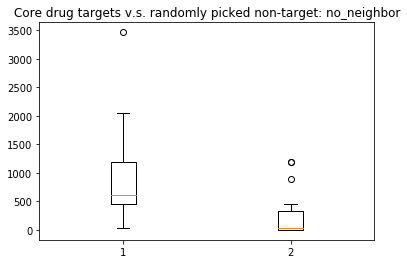

In [62]:
boxplot_two_df(neighbor_sum, non_t_neighbor_sum, 'no_neighbor')

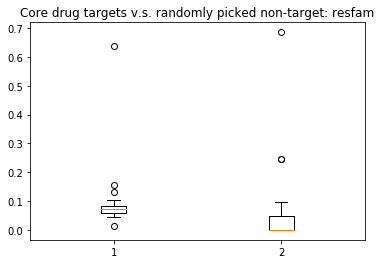

In [66]:
boxplot_two_df(neighbor_sum, non_t_neighbor_sum, 'resfam')

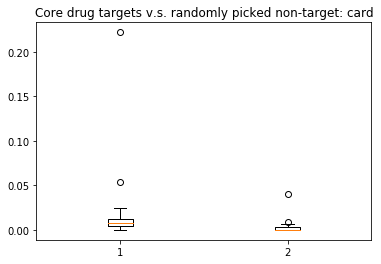

In [67]:
boxplot_two_df(neighbor_sum, non_t_neighbor_sum, 'card')

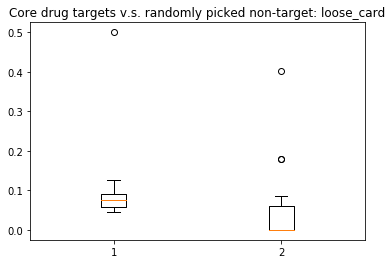

In [68]:
boxplot_two_df(neighbor_sum, non_t_neighbor_sum, 'loose_card')

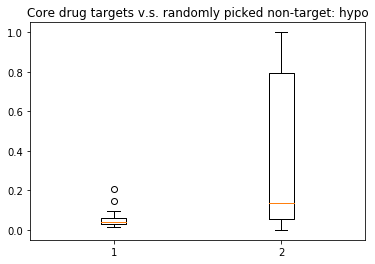

In [69]:
boxplot_two_df(neighbor_sum, non_t_neighbor_sum, 'hypo')

In [71]:
# it's unfair to compare core with non-core
non_t_core = gold_anno.loc[list(net.nodes)].loc[gold_anno['is_drug_target'] == False].loc[gold_anno['core'] == True].sample(n = 28).index

In [72]:
non_t_core_sum = pd.DataFrame(index = non_t_core, columns = ['no_neighbor','resfam', 'card', 'loose_card', 'hypo'])
for t in non_t_core:
    non_t_core_sum.loc[t] = neighbor_resistance(t)

In [73]:
non_t_core_sum

,no_neighbor,resfam,card,loose_card,hypo
562.23608.con.0032_36|562.23608,437,0.0617849,0.00228833,0.0549199,0.112128
JMUY01000009_77|1438670.3,560,0.0321429,0.00714286,0.0375,0.0571429
562.22605.con.0003_247|562.22605,663,0.040724,0.00452489,0.0437406,0.0723982
JMUY01000008_239|1438670.3,326,0.0276074,0.00306748,0.0306748,0.0429448
562.23686.con.0002_1|562.23686,167,0.0658683,0,0.0718563,0.125749
JMUY01000001_290|1438670.3,1385,0.0620939,0.0115523,0.0620939,0.148014
562.22772.con.0062_1|562.22772,4,0,0,0,1
JMUY01000005_530|1438670.3,1250,0.1752,0.0088,0.1384,0.1784
FLXF01000001_624|562.12961,328,0.0670732,0.00304878,0.0640244,0.0579268
JMUY01000002_539|1438670.3,714,0.0616246,0.00980392,0.183473,0.145658


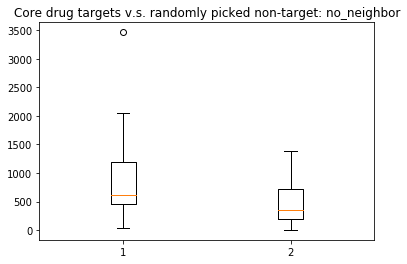

In [74]:
boxplot_two_df(neighbor_sum, non_t_core_sum, 'no_neighbor')

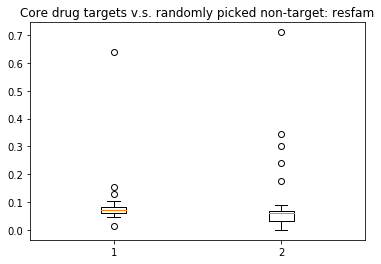

In [75]:
boxplot_two_df(neighbor_sum, non_t_core_sum, 'resfam')

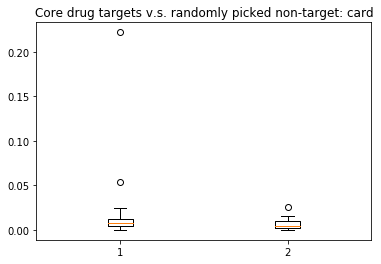

In [76]:
boxplot_two_df(neighbor_sum, non_t_core_sum, 'card')

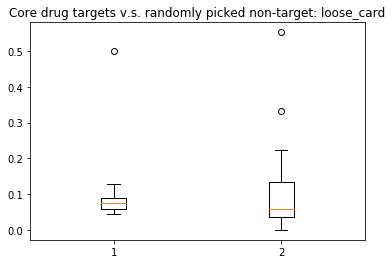

In [77]:
boxplot_two_df(neighbor_sum, non_t_core_sum, 'loose_card')

In [ ]:
# doesn't make sense :-/

# Distance between resistant genes (by mechanism) and drug target

In [85]:
# import parsed CARD data
card_feature = pd.read_csv('/home/hermuba/data0118/network1122/card_category.csv', header = 0, index_col = 0)

In [86]:
card_feature.iloc[0]

antibiotic target replacement protein                                          False
determinant of diaminopyrimidine resistance                                    False
determinant of resistance to glycopeptide antibiotics                          False
determinant of linezolid resistance                                            False
determinant of isoniazid resistance                                            False
determinant of resistance to peptide antibiotics                               False
determinant of macrolide resistance                                            False
determinant of polymyxin resistance                                            False
determinant of sulfonamide resistance                                          False
determinant of fluoroquinolone resistance                                      False
antibiotic resistant gene variant or mutant                                    False
efflux pump complex or subunit conferring antibiotic resistance  

In [122]:
b_lactam = card_feature.loc[card_feature['determinant of beta-lactam resistance'] == True].index

In [90]:
gold_anno.loc[b_lactam]

,cog_ID,cog_category,pathway,GO,nr,cluster,card,domain,hypo_nr,is_card,count,core,resfam,loose_best_ARO,loose_ARO,aclame_title,is_aclame,drug_target,is_drug_target
ORF_ID,,,,,,,,,,,,,,,,,,,
FLWH01000001_220|562.12962,COG0583,K,NaN,"{'GO:0003700', 'GO:0006355'}",WP_004150788.1 MULTISPECIES: LysR family trans...,Cluster 10077,NaN,"{'IPR005119', 'IPR036390', 'IPR036388', 'IPR00...",False,False,2.0,False,NaN,NmcR,"ARO:3003843, ARO:3001938, ARO:3003665, ARO:300...",protein:plasmid:145240 Length: 296 # NCBI anno...,True,NaN,False
FLWH01000001_1050|562.12962,COG1680,V,NaN,NaN,WP_004147279.1 MULTISPECIES: D-alanyl-D-alanin...,Cluster 6205,NaN,"{'IPR001466', 'IPR012338'}",False,False,1579.0,True,"{ClassC-AmpC, CMY-LAT-MOX-ACT-MIR-FOX, DHA}",DHA-3,"ARO:3002184, ARO:3002076, ARO:3002493, ARO:300...",NaN,False,NaN,False
562.22780.con.0005_11|562.22780,COG0583,K,NaN,"{'GO:0003700', 'GO:0006355'}",EFK47565.1 LysR substrate binding domain prote...,Cluster 9457,NaN,"{'IPR005119', 'IPR036390', 'IPR036388', 'IPR00...",False,False,1579.0,True,NaN,NmcR,"ARO:3003843, ARO:3003665",protein:plasmid:132019 Length: 298 # NCBI anno...,True,NaN,False
562.22767.con.0095_2|562.22767,COG2367,V,{'KEGG: 00311+3.5.2.6'},"{'GO:0030655', 'GO:0046677', 'GO:0008800'}",WP_000027057.1 MULTISPECIES: class A broad-spe...,Cluster 10577,"{' ARO:3000934', ' ARO:3001376', ' ARO:3000976...","{'IPR012338', 'IPR023650', 'IPR000871'}",False,True,768.0,False,"{CARB-PSE, CblA, CepA, CfxA, ClassA, CTXM, Exo...",TEM-1,"ARO:3000950, ARO:3000942, ARO:3000910, ARO:300...",protein:plasmid:158859 Length: 286 # NCBI anno...,True,NaN,False
562.22793.con.0035_16|562.22793,COG4615,V,{'KEGG: 00311+3.5.2.6'},"{'GO:0030288', 'GO:0017001', 'GO:0008800'}",WP_002430641.1 MULTISPECIES: precolibactin pep...,Cluster 3202,NaN,"{'IPR001466', 'IPR012338', 'IPR001586'}",False,False,575.0,False,"{ClassC-AmpC, CMY-LAT-MOX-ACT-MIR-FOX, DHA}",CMY-113,"ARO:3002514, ARO:3002076, ARO:3002493, ARO:300...",protein:plasmid:117723 Length: 409 # NCBI anno...,True,NaN,False
562.23232.con.0005_158|562.23232,COG1680,V,NaN,NaN,WP_001315775.1 MULTISPECIES: penicillin bindin...,Cluster 4624,NaN,"{'IPR001466', 'IPR012338', 'IPR022849'}",False,False,477.0,False,"{ClassC-AmpC, CMY-LAT-MOX-ACT-MIR-FOX, DHA}",PDC-2,"ARO:3002184, ARO:3002507, ARO:3002493, ARO:300...",protein:plasmid:122728 Length: 443 # NCBI anno...,True,NaN,False
CP021738_10|562.17621,COG0491,R,NaN,NaN,WP_023408309.1 MULTISPECIES: subclass B1 metal...,Cluster 11332,"{' ARO:3003182', ' ARO:3000589', ' ARO:3002362...","{'IPR001279', 'IPR036866'}",False,True,23.0,False,"{BCII, BlaB, ClassB, DIM-GIM-SIM, IMP, IND, KH...",NDM-5,"ARO:3000590, ARO:3002357, ARO:3000589, ARO:300...",protein:plasmid:121380 Length: 265 # NCBI anno...,True,NaN,False
562.23024.con.0011_83|562.23024,COG0583,K,NaN,"{'GO:0003700', 'GO:0006355'}",EII69035.1 cyn operon transcriptional activato...,Cluster 9295,NaN,"{'IPR037403', 'IPR005119', 'IPR036390', 'IPR03...",False,False,513.0,False,NaN,NmcR,"ARO:3003843, ARO:3000783, ARO:3001792, ARO:300...",protein:plasmid:130687 Length: 326 # NCBI anno...,True,NaN,False
CP021538_48|562.24648,COG2602,V,{'KEGG: 00311+3.5.2.6'},"{'GO:0008658', 'GO:0017001', 'GO:0008800'}",WP_001337584.1 MULTISPECIES: oxacillin-hydroly...,Cluster 11137,{'ARO:3001404'},"{'IPR012338', 'IPR002137', 'IPR001460'}",False,True,8.0,False,"{blaR1, ClassD, mecR1}",OXA-9,ARO:3001404,protein:plasmid:17005 Length: 274 # NCBI annot...,True,NaN,False


In [121]:
len(b_lactam)

50

In [92]:
len(set(b_lactam).intersection(set(net.nodes))) # all are in the net yeah

50

In [113]:
gold_anno.loc['562.23614.con.0021_34|562.23614']

cog_ID                                                      COG5009
cog_category                                                      M
pathway           {'MetaCyc: PWY-6385', 'KEGG: 00550+2.4.1.129+3...
GO                                                   {'GO:0008658'}
nr                WP_001296475.1 carboxypeptidase/penicillin-bin...
cluster                                                 Cluster 819
card                                                            NaN
domain            {'IPR031376', 'IPR036950', 'IPR023346', 'IPR00...
hypo_nr                                                       False
is_card                                                       False
count                                                          1579
core                                                           True
resfam                                                          NaN
loose_best_ARO                                                  NaN
loose_ARO                                       

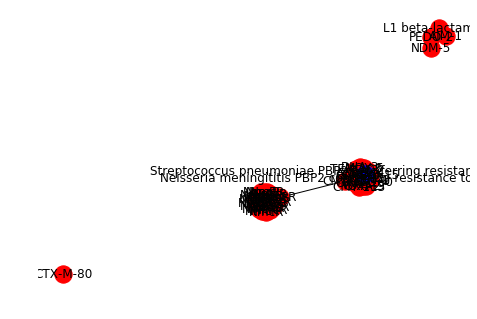

In [141]:

b = net.subgraph(b_lactam) # add target gene to the end
pos=nx.spring_layout(b)

# color nodes

nx.draw(b, pos) # so ugly?

labels=gold_anno.loc[b_lactam, 'loose_best_ARO'].to_dict()
nx.draw_networkx_labels(b,pos,fontsize=1, labels= labels)

# 只要加入 target gene 就無比的慢

In [146]:
count = []
for i in b_lactam:
    try:
        count.append(nx.shortest_path_length(net, source='562.23614.con.0021_34|562.23614', target=i, weight=None))
    except nx.exception.NetworkXNoPath:
        print('no path')

no path


In [144]:
not_b = card_feature.loc[card_feature['determinant of beta-lactam resistance'] == False].sample(50).index

In [147]:
no_count = []
for i in not_b:
    try:
        no_count.append(nx.shortest_path_length(net, source='562.23614.con.0021_34|562.23614', target=i, weight=None))
    except nx.exception.NetworkXNoPath:
        print('no path')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f44b8598e48>,
 'caps': [<matplotlib.lines.Line2D at 0x7f44b85a0550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f44b8598cf8>,
 'medians': [<matplotlib.lines.Line2D at 0x7f44b85a0be0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f44b85a0f28>,
 'means': []}

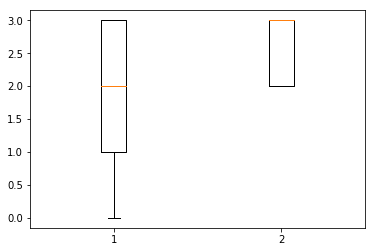

In [148]:
plt.boxplot([count, no_count])